
  
## 4. Upload Files  
  
The following script upload images we’re prepared in a single folder located on the machine running this notebook. Alternatively you can:
1. Run this or any other script locally to upload your own files from your machine
2. Drag & drop files on the Dataset-browser page


In [ ]:
import dtlpy as dl

project_id = 'project_id'
dataset_id = 'dataset_id'
local_path = './images/other/'
remote_path = '/first_images'


project = dl.projects.get(project_id=project_id)
dataset = project.datasets.get(dataset_id=dataset_id)
items = dataset.items.upload(local_path=local_path,
                     remote_path=remote_path)

**Reminder:** When connecting your cloud storage, files are not uploaded, they are only indexed while the actual binary files remain in your storage.


  
  
## 5. Refresh the page
  
Click the refresh button to see the files uploaded to the dataset

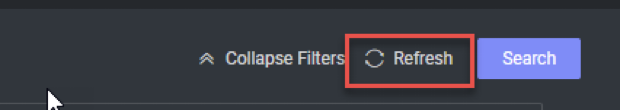
 
  


  
## 6. Add Metadata

Up-tp 100 different searchable meta-date keys can be added to files in a single datasets. Those meta-data keys can then be used to search and filter data while curating the dataset, or even while streaming data through Pipelines. 


In [17]:
for item in items:
    item.metadata['user'] = {'source':'jupyter_notebook'}
    item.update()


## 7. Upload Annotations 
Once again, this example upload annotations we’ve prepared alongside the images in the machine running the notebook. 

Alternatively you can run this or any other script locally, to load annotation from your local machine. You can then experience with other annotation types, such frame-based annotation onto video files, text annotations onto documents, prompt/response and more.
 
  


In [ ]:
import pandas as pd


# First item:
local_path1 = r'./images/snake/8dc203e3a9.jpg'
local_annotations_path1 = r"./images/snake/8dc203e3a9.json"
remote_path1 = '/'
remote_name1 = 'snake.jpg'
item_metadata1 = {'user': {'type': 'snake_image'}}
# Second item:
local_path2 = r"./images/bird/0f67ffd92d.jpg"
local_annotations_path2 = r"./images/bird/0f67ffd92d.jpg"
remote_path2 = "/"
remote_name2 = 'bird.jpg'
item_metadata2 = {'user': {'type': 'bird_image'}}

to_upload = list()
# First item and info attached:
to_upload.append({'local_path': local_path1,  # Local path to image
                  'local_annotations_path': local_annotations_path1,  # Local path to annotation file
                  'remote_path': remote_path1,  # Remote directory of uploaded image
                  'remote_name': remote_name1,  # Remote name of image
                  'item_metadata': item_metadata1})  # Metadata for the created item
# Second item and info attached:
to_upload.append({'local_path': local_path2,  # Local path to image
                  'local_annotations_path': local_annotations_path2,  # Local path to annotation file
                  'remote_path': remote_path2,  # Remote directory of uploaded image
                  'remote_name': remote_name2,  # Remote name of image
                  'item_metadata': item_metadata2})  # Metadata for the created item
df = pd.DataFrame(to_upload)  # Make data into DF table
items = dataset.items.upload(local_path=df,
                             overwrite=True)  # Upload DF to platform


## 8. Arrange Data in Folders

Create folders and move file items into them, or upload file items directly into a folder. Up-to 1,000 folders in a single dataset enabled arranging data by your context.

In [ ]:
directory = '/snakes'

dataset.items.make_dir(directory=directory)

item = dataset.items.get(filepath='/snake.jpg')
item.move(new_path=directory)

## 9. Filter Data

Dataloop Query Language allows you to search and filter data based on any item and annotation attributes, including meta-data and feature-vectors. 
The following example uses the files and meta-data we prepared in advance to search for all files with annotations and add them to a ‘Train set’.

In [ ]:
filters = dl.Filters()
filters.add(field='annotated', values=True)
pages = dataset.items.list(filters=filters)

items = [item for page in pages for item in page]

for item in items:
    print(item.filename)

## 10. Add Feature Vectors

You can install an embedder model from the Dataloop marketplace to extract the features from all the files in the dataset. Alternatively, if you extract features using proprietary models, you can use the SDK to upload features directly onto an item. Here, we will upload dummy vector.

In [ ]:
feature_set_name = 'onboarding_feature_set'
try:
   feature_set = project.feature_sets.get(feature_set_name=feature_set_name)
   print('Feature set already exists')
except dl.exceptions.NotFound:
   print('Creating feature set')
   feature_set = project.feature_sets.create(name=feature_set_name,
                                                    entity_type=dl.FeatureEntityType.ITEM,
                                                    project_id=project.id,
                                                    set_type='onboarding',
                                                    size=10)
   
dummy_embeddings = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

item = items[0]
feature = feature_set.features.create(value=dummy_embeddings, entity=item)

## 11. Export Data
If you prefer training your models in environments other than Dataloop you can easily export everything following Dataloop JSON format, or use a converter to export in one of the common formats like COCO. You can export for all files in the Dataset, or again, use a filter to export for selected files.

In [ ]:
filters = dl.Filters()
filters.add(field='metadata.user.source', values='jupyter_notebook')
dataset.items.download(filters=filters)


**Reminder:** The command above will download everything to the cloud machine running the Jupyter notebook, not to your local machine.